In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Import the Logistic Regression class
from xgboost import XGBClassifier # Import the XGBClassifier class
# from lightgbm import LGBMClassifier # Import the LGBMClassifier class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score,roc_curve, balanced_accuracy_score, recall_score
import pickle
sns.set()
print('Done importing the libraries.')

Done importing the libraries.


In [15]:
# Loading the dataset into variable 'data'
raw_data = pd.read_csv("diabetes-dataset.csv")
print('Dataset loaded successfully.')

Dataset loaded successfully.


In [16]:
# Display the first few rows to understand the structure of the dataset
raw_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [17]:
f_values = {}
for i in raw_data.columns:
    count = raw_data[i].nunique()
    if count == 1:
        f_values[i] = count

cols_drop = list(f_values.keys())
print('Columns to drop are: ',cols_drop)

Columns to drop are:  []


In [18]:
# Overview of data types and missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [19]:
raw_data.shape
raw_data_row = raw_data.shape[0]
raw_data_col = raw_data.shape[1]

print("The raw data has",raw_data_row,"rows and",raw_data_col,"columns.")

The raw data has 100000 rows and 9 columns.


In [20]:
#check unique values
unique_values = {}
for col in raw_data.columns:
    unique_values[col] = raw_data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4247
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [21]:
#select variables that are medically likely to predict diabetes
data = raw_data[["gender","age","hypertension",	"smoking_history",	"bmi",	"HbA1c_level",	"blood_glucose_level",	"diabetes"]]
data

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,never,25.19,6.6,140,0
1,Female,54.0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,never,27.32,5.7,158,0
3,Female,36.0,0,current,23.45,5.0,155,0
4,Male,76.0,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,never,35.42,4.0,100,0


In [22]:
df = pd.DataFrame(data)

# Count occurrences of the attribute
attribute_count = df['gender'].value_counts().get('male', 1)

# Calculate percentage
total_entries = len(df)
percentage = (attribute_count / total_entries) * 100

print(f"Percentage of 'value1' in 'column_name': {percentage:.2f}%")

Percentage of 'value1' in 'column_name': 0.00%


In [23]:
# Data cleaning


# # Convert 'Female' to 0 and 'Male' to 1, and handle remaining NaN values
# data['gender'] = data['gender'].fillna('Other').map({'Female': 0, 'Male': 1, 'Other': -1}).astype(int)
# #Convert Age to Integer instead of Float
# data['age'] = data['age'].astype(int)
# # Convert Smoking History to integer
# data['smoking_history'] = data['smoking_history'].map({'never': 0, 'current': 1,  'ever': 1, 'not current': 1, 'former': 1, 'No Info': -1})


# Convert 'Female' to 0 and 'Male' to 1, and handle remaining NaN values
data['gender'] = data['gender'].fillna('Other').map({'Female': 0, 'Male': 1, 'Other': -1}).astype(int)

# Convert Age to Integer instead of Float
data['age'] = data['age'].astype(int)

# Convert Smoking History to integer, filling NaN values with 'No Info'
data['smoking_history'] = data['smoking_history'].fillna('No Info').map({'never': 0, 'current': 1,  'ever': 1, 'not current': 1, 'former': 1, 'No Info': -1})

# Check the dataset
data



#Check the dataset
data

/var/folders/jy/jtn3c__x48dc9xw74wlygz_00000gn/T/ipykernel_78998/997891945.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = data['gender'].fillna('Other').map({'Female': 0, 'Male': 1, 'Other': -1}).astype(int)
/var/folders/jy/jtn3c__x48dc9xw74wlygz_00000gn/T/ipykernel_78998/997891945.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype(int)
/var/folders/jy/jtn3c__x48dc9xw74wlygz_00000gn/T/ipykernel_78998/997891945.py:19: SettingWithCopyWarning: 
A value 

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,0,25.19,6.6,140,0
1,0,54,0,-1,27.32,6.6,80,0
2,1,28,0,0,27.32,5.7,158,0
3,0,36,0,1,23.45,5.0,155,0
4,1,76,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80,0,-1,27.32,6.2,90,0
99996,0,2,0,-1,17.37,6.5,100,0
99997,1,66,0,1,27.83,5.7,155,0
99998,0,24,0,0,35.42,4.0,100,0


In [24]:
# data = pd.get_dummies(data, columns=['smoking_history'], prefix='smoking')

#Check the dataset
# data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   smoking_history      100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 6.1 MB


In [26]:
column_names = data.columns
print(column_names)

Index(['gender', 'age', 'hypertension', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


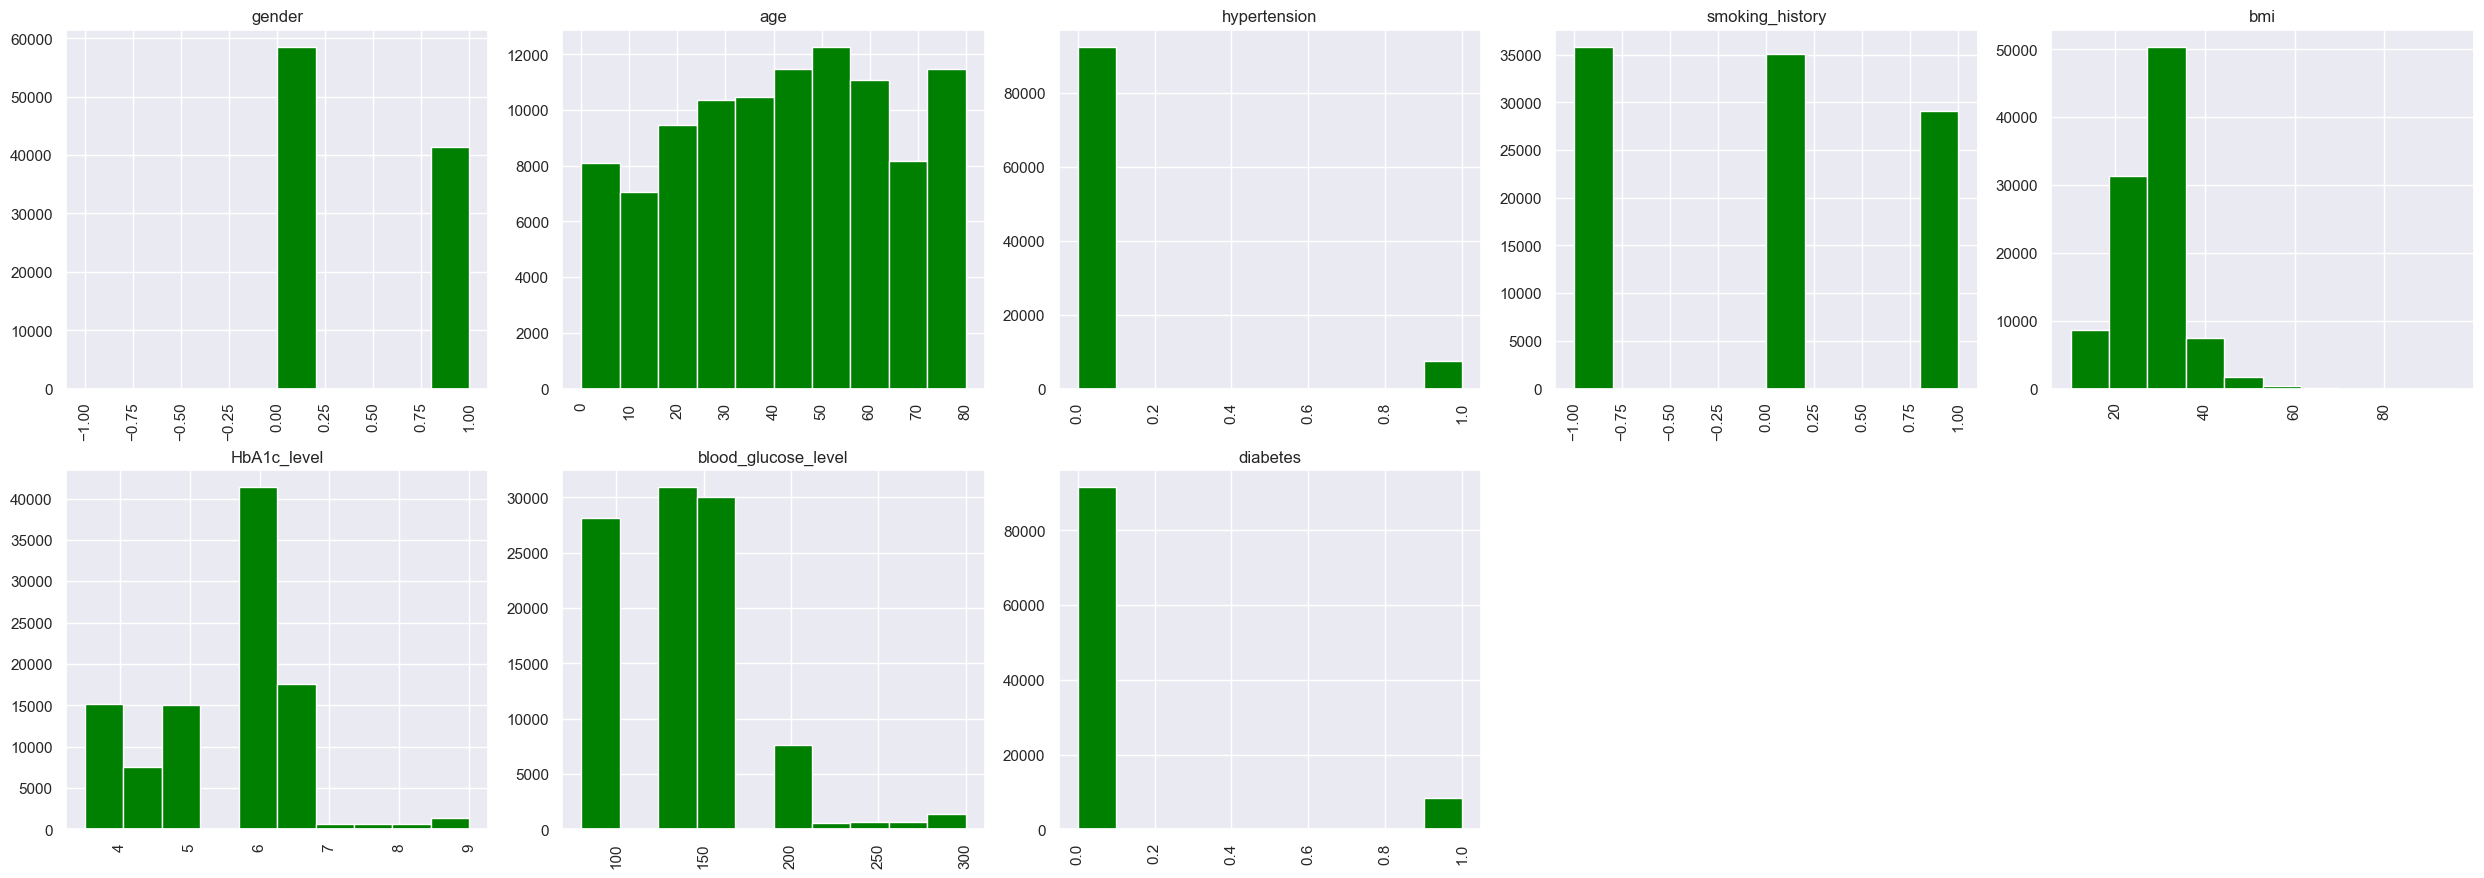

In [27]:
#check frequency of all values in the column

# All data columns except for color
feature_cols = [x for x in data.columns]
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(data[feature_cols[i]],color = "green")
    
plt.tight_layout()

<Axes: title={'center': 'Correlation with Diabetes'}>

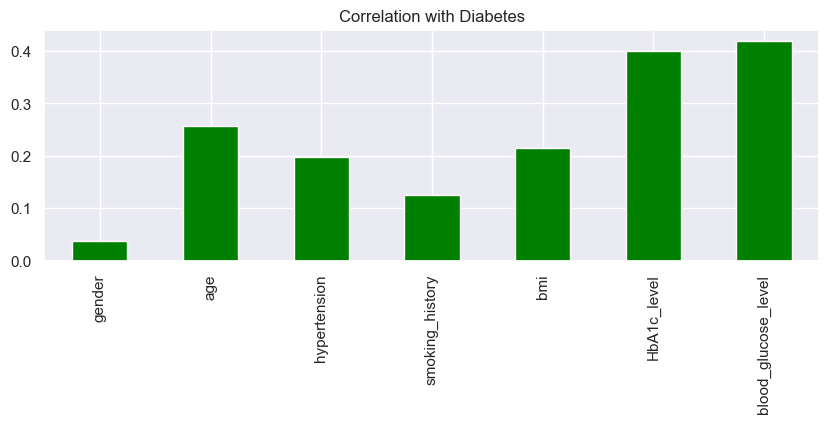

In [28]:
#check correlation of other columns with diabetes column
data.drop('diabetes', axis=1).corrwith(data.diabetes).plot(kind='bar', grid=True, figsize=(10, 3), title="Correlation with Diabetes",color="green")

<Axes: >

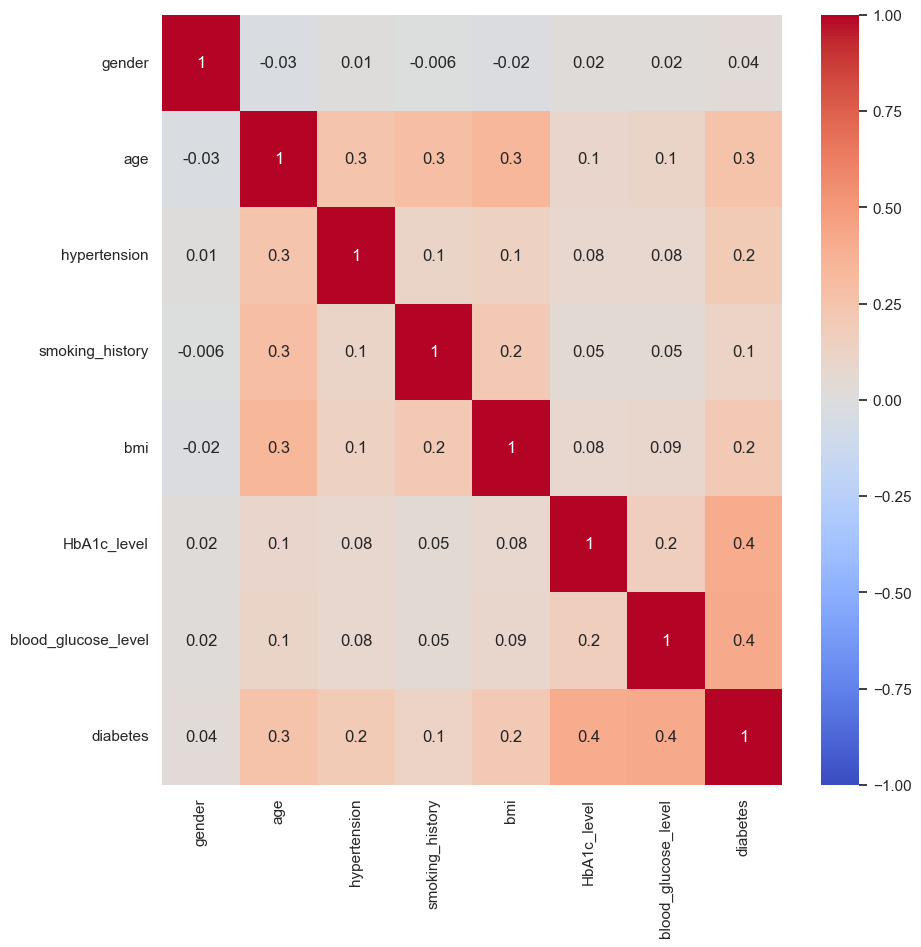

In [29]:
# Correlation between any two features
# check for possible co-variates

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

<Figure size 1200x500 with 0 Axes>

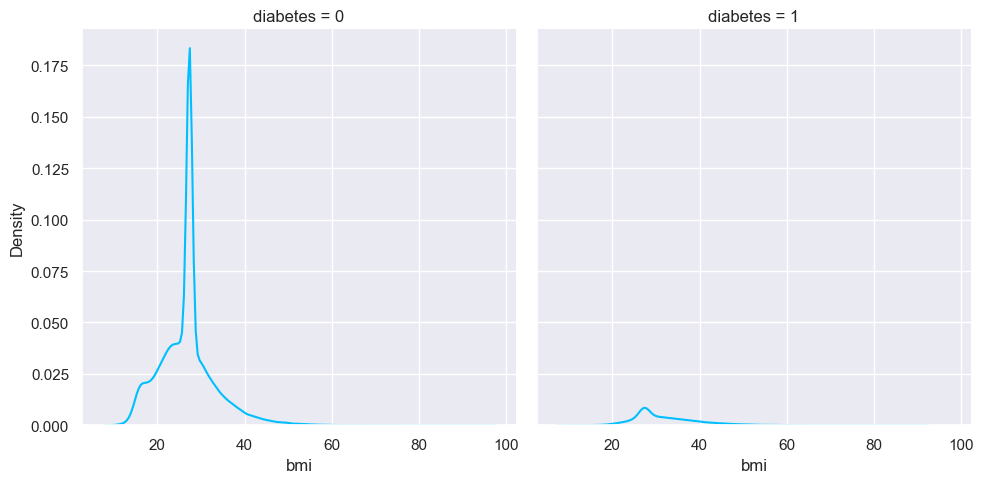

In [30]:
#for numeric variables
plt.figure(figsize=(12,5))
sns.displot(x='bmi', col='diabetes' , data = data, kind="kde" ,color = 'deepskyblue')

<Figure size 1200x2000 with 0 Axes>

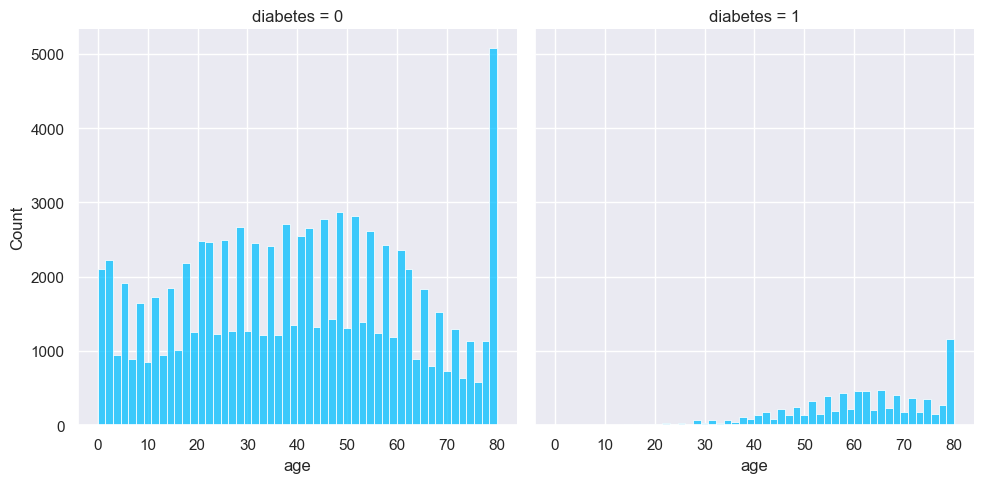

In [31]:
plt.figure(figsize=(12,20))
sns.displot(data=data,col='diabetes',x='age',color='deepskyblue')

In [32]:
# # Pairplot figure to show correlation betweean features
# sns.set(style='ticks', color_codes=True)
# figs = sns.pairplot(data, palette = ('g', 'r'), hue='diabetes', height=1.5)
# plt.show()

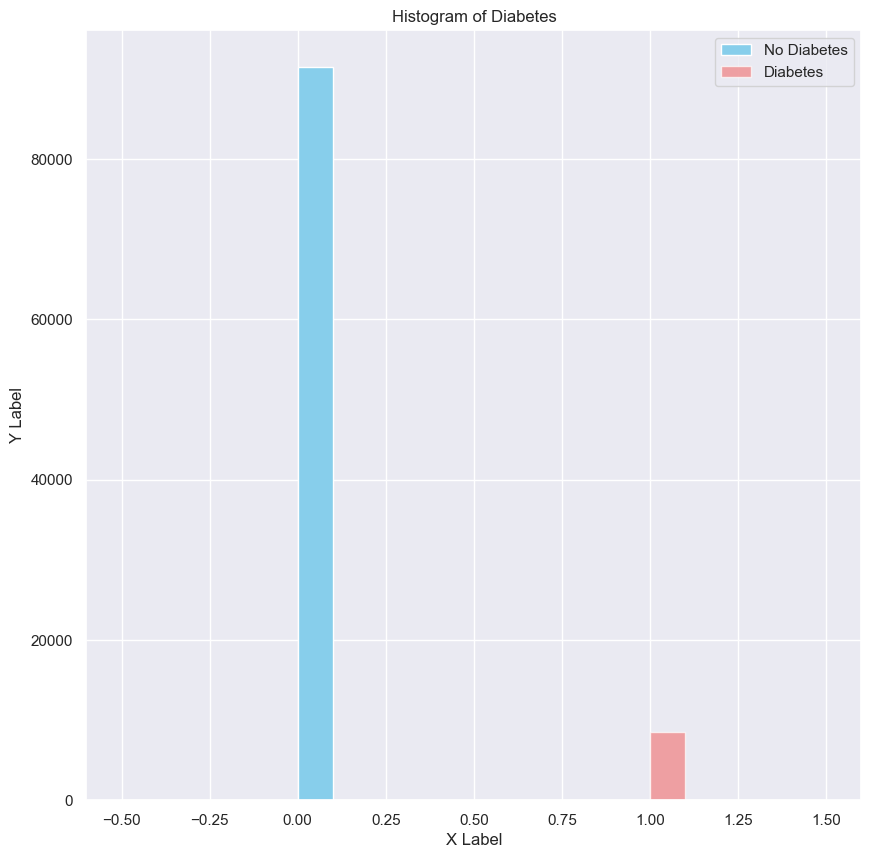

In [33]:
#  Histogram
# Separate the data into two groups: diabetes and no diabetes
diabetes_data = data[data['diabetes'] == 1]['diabetes']
no_diabetes_data = data[data['diabetes'] == 0]['diabetes']

# Plot two histograms with different colors
plt.hist(no_diabetes_data, bins=10, color='skyblue', label='No Diabetes')
plt.hist(diabetes_data, bins=10, color='lightcoral', label='Diabetes', alpha=0.7)  # Use alpha to control transparency
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Histogram of Diabetes')
plt.legend()  # Show legend for clarity
plt.show()


In [34]:
diabetes_count = len(data[data['diabetes'] == 1])
print("Number of people with diabetes:", diabetes_count)

Number of people with diabetes: 8500


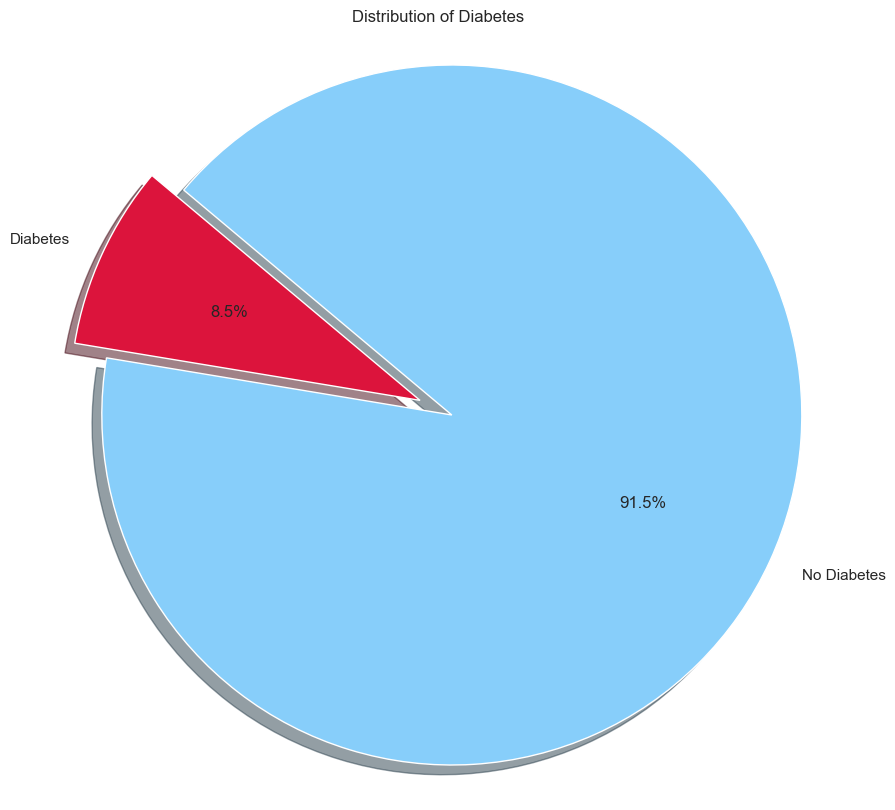

In [35]:
# Count the number of people with and without diabetes
diabetes_count = len(data[data['diabetes'] == 1])
no_diabetes_count = len(data[data['diabetes'] == 0])

# Create labels and sizes for the pie chart
labels = ['Diabetes', 'No Diabetes']
sizes = [diabetes_count, no_diabetes_count]
colors = ['crimson', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice (Diabetes)

# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Diabetes')
plt.show()

In [36]:
# Define custom summary statistics function
def custom_summary_statistics(data):
    # Compute mean, median, standard deviation, etc.
    mean = data.mean()
    median = data.median()
    std = data.std()
    # Add more summary statistics as needed
    return mean, median, std

# Assuming 'data' is your DataFrame
mean, median, std = custom_summary_statistics(data)
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)

Mean: gender                   0.414120
age                     41.875660
hypertension             0.074850
smoking_history         -0.067270
bmi                     27.320767
HbA1c_level              5.527507
blood_glucose_level    138.058060
diabetes                 0.085000
dtype: float64
Median: gender                   0.00
age                     43.00
hypertension             0.00
smoking_history          0.00
bmi                     27.32
HbA1c_level              5.80
blood_glucose_level    140.00
diabetes                 0.00
dtype: float64
Standard Deviation: gender                  0.492937
age                    22.535417
hypertension            0.263150
smoking_history         0.802827
bmi                     6.636783
HbA1c_level             1.070672
blood_glucose_level    40.708136
diabetes                0.278883
dtype: float64


In [37]:

# Define features (X) and target variable (y)
# X = data[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
#         'gender_Female', 'gender_Male', 'smoking_history_No Info', 'smoking_history_current', 'smoking_history_never']]

X = data.drop('diabetes', axis=1)
y = data['diabetes']

data.head()
# y = data['diabetes']

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,0,25.19,6.6,140,0
1,0,54,0,-1,27.32,6.6,80,0
2,1,28,0,0,27.32,5.7,158,0
3,0,36,0,1,23.45,5.0,155,0
4,1,76,1,1,20.14,4.8,155,0


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

training_set_row = X_train.shape[0]
test_set_row = X_test.shape[0]
training_set_col = X_train.shape[1]
test_set_col = X_train.shape[1]

training_set = (training_set_row/raw_data_row)
test_set = (test_set_row/raw_data_row)

print("The training data has",training_set_row,"rows and",training_set_col,"columns.")
print("The testing data has",test_set_row,"rows and",test_set_col,"columns.")
print()
print("The model is being trained using " , training_set *100,"%"," of the dataset.")
print("The model is being tested using " , test_set *100,"%"," of the dataset.")

The training data has 80000 rows and 7 columns.
The testing data has 20000 rows and 7 columns.

The model is being trained using  80.0 %  of the dataset.
The model is being tested using  20.0 %  of the dataset.


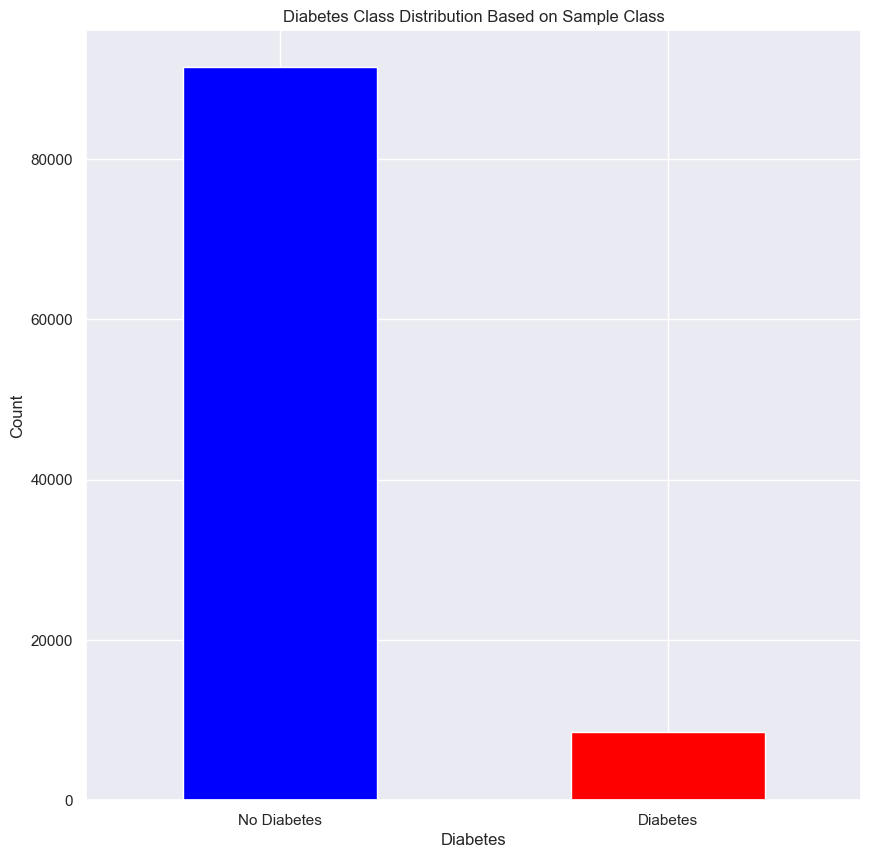

In [39]:
data['diabetes'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Class Distribution Based on Sample Class')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

In [40]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# sns.scatterplot(x=data['blood_glucose_level'],y=data['hypertension'], hue=data['diabetes'])

In [42]:
# Create and train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = log_model.predict(X_test_scaled)

In [43]:
########################## XGBClassifier ################################

xgm_model= XGBClassifier()
xgm_model.fit(X_train_scaled, y_train)
y_pred_xgb =xgm_model.predict(X_test_scaled)
xgb = accuracy_score(y_pred_xgb, y_test)
xgb 



0.97155

In [44]:
# Train and evaluate kNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)


In [45]:
######################## Light Gradient Boosting Machine Classifier ################################

# lgbm_model= LGBMClassifier(verbosity=-1)
# lgbm_model.fit(X_train_scaled, y_train)
# y_pred_lgbm =lgbm_model.predict(X_test_scaled)
# lgbm_accuracy= accuracy_score(y_pred_lgbm, y_test)
# lgbm_accuracy


In [46]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model(y_test, y_pred):
    #fit the model instance 

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    
    # print("Accuracy:", accuracy)
    # print("Precision:", precision)
    # print("Recall:", recall)
    # print("F1 Score:", f1)
    # print("ROC AUC Score:", auc)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Balanced Accuracy', 'AUC'])
    return eval_df

#model metrics

# results = train_evaluate_model(y_test)
# results.index = ['Logistic Regression']
# results.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))

log_results = train_evaluate_model(y_test, y_pred)
xgb_results = train_evaluate_model(y_test, y_pred_xgb)
knn_results = train_evaluate_model(y_test, y_pred_knn)

# Combine results into a single DataFrame
combined_results = pd.concat([log_results, xgb_results, knn_results], keys=['Logistic Regression', 'XGBoost', 'KNN'])
combined_results.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))



,,Accuracy,F1 Score,Precision,Recall,Balanced Accuracy,AUC
Logistic Regression,0,0.959100,0.718707,0.870833,0.611827,0.801677,0.801677
XGBoost,0,0.971550,0.806265,0.963385,0.693208,0.845374,0.845374
KNN,0,0.963050,0.745085,0.906801,0.632319,0.813125,0.813125


In [47]:
# Store their evaluation results in a dictionary
model_results = {
    'Logistic Regression': log_results,
    'XGBoost': xgb_results,
    'k-Nearest Neighbors': knn_results
}

In [48]:
# Find the model with the highest accuracy
best_model_name = max(model_results, key=lambda k: model_results[k]['Accuracy'].iloc[0])
best_model = None

# Retrieve the best model
if best_model_name == 'Logistic Regression':
    best_model = log_model
elif best_model_name == 'XGBoost':
    best_model = xgm_model
elif best_model_name == 'k-Nearest Neighbors':
    best_model = knn_model
    
# print(best_model_name)
# print(best_model)



In [49]:
# Save the best model and scaler to files
if best_model:
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print(f"The best model ({best_model_name}) has been saved to 'best_model.pkl'.")

    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    print("The scaler has been saved to 'scaler.pkl'.")
else:
    print("Error: No best model found.")

The best model (XGBoost) has been saved to 'best_model.pkl'.
The scaler has been saved to 'scaler.pkl'.


In [50]:
# # Make predictions on the test set
# # y_pred = model.predict(X_test)

# # Create confusion matrix
# cm = confusion_matrix(y_test, log_model_y_pred)

# # Plot confusion matrix as heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

In [51]:
# # assigning values to True Positives, False Negative etc
# TP = cm[1, 1]
# TN = cm[0, 0]
# FP = cm[0, 1]
# FN = cm[1, 0]
# # sensitivity score = TP/ (TP+FN)
# sensitivity = TP/ (TP+FN)
# print(sensitivity)

In [52]:
# # Compute Precision-Recall curve
# precision, recall, _ = precision_recall_curve(y_test, y_pred)
# average_precision = average_precision_score(y_test, y_pred)

In [53]:
# # Plot Precision-Recall curve
# plt.figure()
# lw = 2
# plt.plot(recall, precision, color='blue', lw=lw, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(loc="lower right")
# plt.show()

In [54]:
# # Compute ROC curve and ROC area for each class
# fpr, tpr, _ = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

In [55]:
# # Plot ROC curve
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()